<a href="https://colab.research.google.com/github/MitaTriAndari/Kelompok_2/blob/main/Transformasi_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mita Tri Andari 2106049 TI-C**

**Transformasi Fourier**


### **Original Image**

Text(0.5, 1.0, 'Original image')

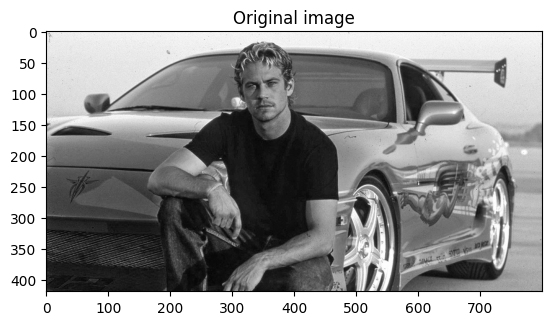

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import io #import io untuk membaca gambar

im = io.imread("/content/paul walker.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

### **Fourier Transform**

Text(0.5, 1.0, 'Fourier transform')

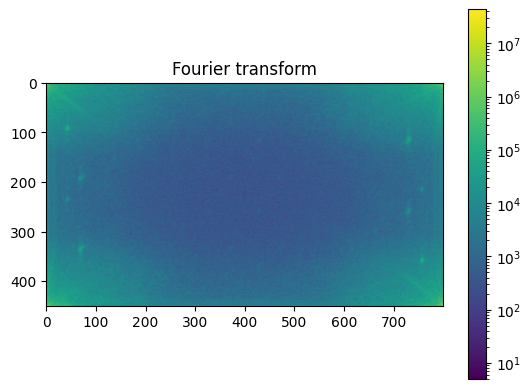

In [ ]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Tunjukkan hasilnya

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
   # Peta warna logaritmik
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

### **Filtered Spectrum**

Text(0.5, 1.0, 'Filtered Spectrum')

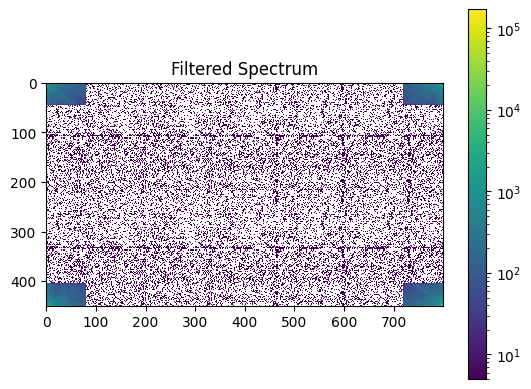

In [ ]:
# Pada baris berikut,akan membuat salinan spektrum asli dan
# memotong koefisien.

# Tentukan pecahan koefisien (di setiap arah) yang kita pertahankan
keep_fraction = 0.1

# Panggil ff salinan transformasi asli. Array numpy memiliki salinannya
# metode untuk tujuan ini.
im_fft2 = im_fft.copy()

# Tetapkan r dan c menjadi jumlah baris dan kolom array.
r, c = im_fft2.shape

# Atur ke nol semua baris dengan indeks antara r*keep_fraction dan
# r*(1-pertahankan_fraksi):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Begitu pula dengan kolom:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

### **Rekontruksi Image**

Text(0.5, 1.0, 'Reconstructed Image')

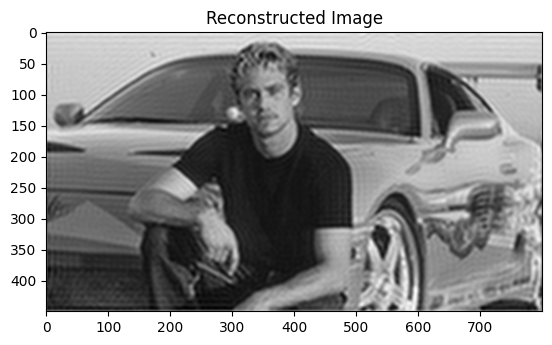

In [ ]:
# Rekonstruksi gambar yang di-denoisasi dari spektrum yang difilter, simpan hanya gambar tersebut
# bagian nyata untuk dipajang.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

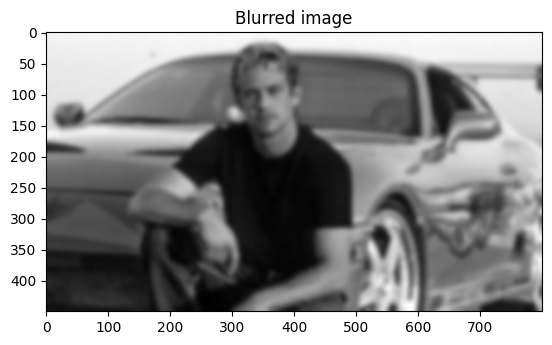

In [ ]:
#gambar menjadi blur
from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()

### **Merubah Image menjadi FFT Frequency Spectrum dan Inverse FFT image Reconstructed**

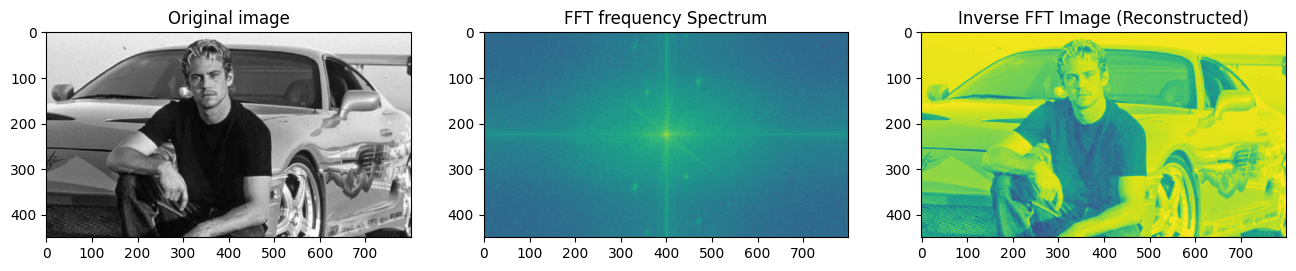

In [ ]:
#Baca dan plot gambarnya
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
from scipy.fft import fft2, fftshift
from scipy import fftpack
from skimage import img_as_float
from skimage.color import rgb2gray

image_ori = skimage.io.imread('/content/Paul Walker.jpg')
gray_image = skimage.color.rgb2gray(image_ori)
image = gray_image

image_f = np.abs(fftshift(fft2(image)))
im_fft = fftpack.fft2(image)
inverse_f = fftpack.ifft2(im_fft).real

fig, axes = plt.subplots(1, 3, figsize=(16, 16))
ax = axes.ravel()

ax[0].set_title("Original image")
ax[0].imshow(image, cmap='gray')

ax[1].set_title("FFT frequency Spectrum")
ax[1].imshow(np.log(image_f))

ax[2].set_title("Inverse FFT Image (Reconstructed)")
ax[2].imshow(np.log(inverse_f))

plt.show()